# Exploratory data analysis

Uncovering underlying data structures.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/online_shoppers_intention.csv")
dataset.head().T

0                  1  \
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                            0                  0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0               64.0   
BounceRates                            0.2                0.0   
ExitRates                              0.2                0.1   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         1                  2   
Browser                                  1                  2   
Region                                   1                  1   
TrafficType                              1                  2   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                              False              False   
Revenue                              False              False   

                                         2                  3  \
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                            0                  0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0           2.666667   
BounceRates                            0.2               0.05   
ExitRates                              0.2               0.14   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         4                  3   
Browser                                  1                  2   
Region                                   9                  2   
TrafficType                              3                  4   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                              False              False   
Revenue                              False              False   

                                         4  
Administrative                           0  
Administrative_Duration                0.0  
Informational                            0  
Informational_Duration                 0.0  
ProductRelated                          10  
ProductRelated_Duration              627.5  
BounceRates                           0.02  
ExitRates                             0.05  
PageValues                             0.0  
SpecialDay                             0.0  
Month                                  Feb  
OperatingSystems                         3  
Browser                                  3  
Region                                   1  
TrafficType                              4  
VisitorType              Returning_Visitor  
Weekend                               True  
Revenue                              False

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Printing dimensionality of the data, columns, types and missing values
print(f"Data dimension: {dataset.shape}")
for col in dataset.columns:
    print(
        f"Column: {col:35} | "
        f"type: {str(dataset[col].dtype):7} | "
        f"missing values: {dataset[col].isna().sum():3d}"
    )

Data dimension: (12330, 18)
Column: Administrative                      | type: int64   | missing values:   0
Column: Administrative_Duration             | type: float64 | missing values:   0
Column: Informational                       | type: int64   | missing values:   0
Column: Informational_Duration              | type: float64 | missing values:   0
Column: ProductRelated                      | type: int64   | missing values:   0
Column: ProductRelated_Duration             | type: float64 | missing values:   0
Column: BounceRates                         | type: float64 | missing values:   0
Column: ExitRates                           | type: float64 | missing values:   0
Column: PageValues                          | type: float64 | missing values:   0
Column: SpecialDay                          | type: float64 | missing values:   0
Column: Month                               | type: object  | missing values:   0
Column: OperatingSystems                    | type: int64   | missing 

In [5]:
# Computing statistics on numerical features
dataset.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

<a id="univariate"></a>
## Univariate analysis

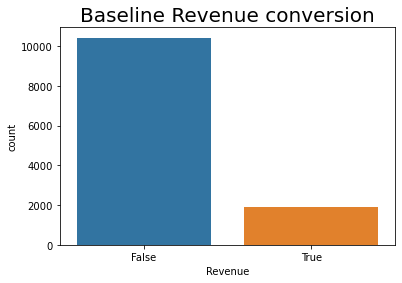

In [6]:
# Baseline Conversion Rate from the Revenue Column
sns.countplot(dataset["Revenue"])
plt.title("Baseline Revenue conversion", fontsize=20)
plt.show()

In [7]:
print(dataset["Revenue"].value_counts())
print()
print(dataset["Revenue"].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


The baseline conversion rate of online visitors versus overall visitors is a ratio between the total number of online sessions that led to a purchase divided by the total number of sessions.

In [8]:
print(1908 / 12330 * 100)

15.474452554744525


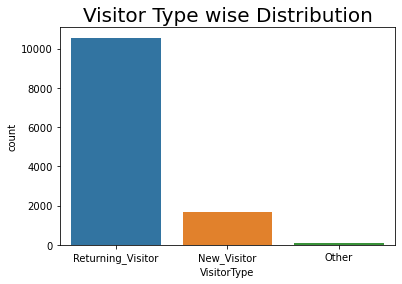

In [9]:
# Visitor-Wise Distribution
sns.countplot(dataset["VisitorType"])
plt.title("Visitor Type wise Distribution", fontsize=20)
plt.show()

In [10]:
# Calculation exact number of each visitor type
print(dataset["VisitorType"].value_counts())
print()
print(dataset["VisitorType"].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


The number of returning customers is higher than that of new visitors.

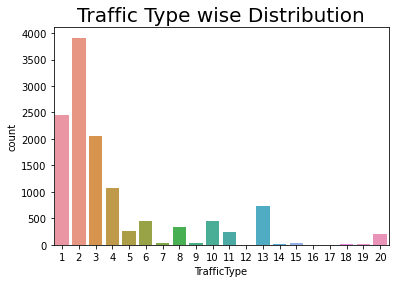

In [11]:
# Traffic-Wise Distribution
sns.countplot(dataset["TrafficType"])
plt.title("Traffic Type wise Distribution", fontsize=20)
plt.show()

In [12]:
print(dataset["TrafficType"].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


Sources 2, 1, 3, and 4 account for the majority of our web traffic.

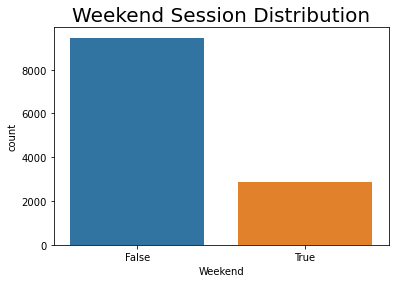

In [13]:
# Distribution of Customers Session on the Website
sns.countplot(dataset["Weekend"])
plt.title("Weekend Session Distribution", fontsize=20)
plt.show()

In [14]:
# Count of each subcategory in the weekend column
print(dataset["Weekend"].value_counts())
print()
print(dataset["Weekend"].value_counts(normalize=True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


More visitors visit during weekdays than weekend days.

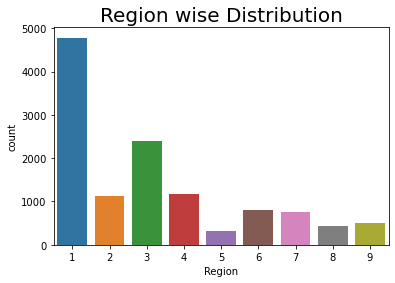

In [15]:
# Region-Wise Distribution
sns.countplot(dataset["Region"])
plt.title("Region wise Distribution", fontsize=20)
plt.show()

In [16]:
print(dataset["Region"].value_counts())
print()
print(dataset["Region"].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


Regions 1 and 3 account for 50% of online sessions.

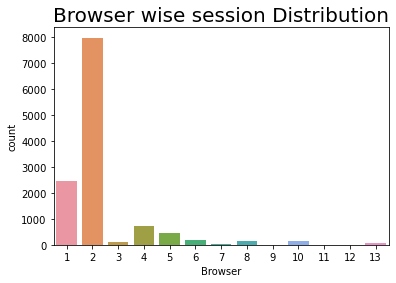

In [17]:
# Browser and OS Distribution of Customers
sns.countplot(dataset["Browser"])
plt.title("Browser wise session Distribution", fontsize=20)
plt.show()

In [18]:
print(dataset["Browser"].value_counts())
print()
print(dataset["Browser"].value_counts(normalize=True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


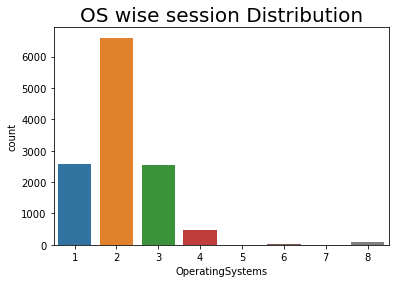

In [19]:
sns.countplot(dataset["OperatingSystems"])
plt.title("OS wise session Distribution", fontsize=20)
plt.show()

In [20]:
print(dataset["OperatingSystems"].value_counts())
print()
print(dataset["OperatingSystems"].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


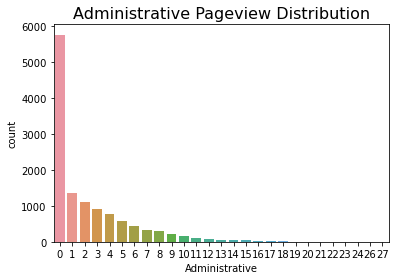

In [21]:
# Administrative Pageview Distribution
sns.countplot(dataset["Administrative"])
plt.title("Administrative Pageview Distribution", fontsize=16)
plt.show()

Users tend to visit page 0 the most often.

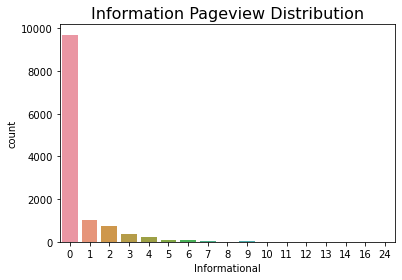

In [22]:
# Information Pageview Distribution
sns.countplot(dataset["Informational"])
plt.title("Information Pageview Distribution", fontsize=16)
plt.show()

In [23]:
# Percentage count for each information page
print(dataset["Informational"].value_counts(normalize=True))

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


79% of users are visiting pages 0 and 1.

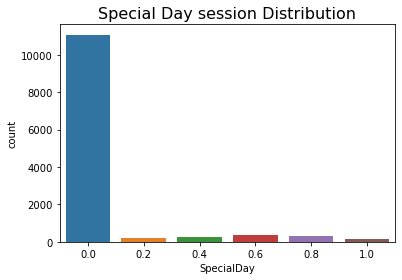

In [24]:
# Special Day Session Distribution
sns.countplot(dataset["SpecialDay"])
plt.title("Special Day session Distribution", fontsize=16)
plt.show()

In [25]:
# Percentage distribution for special days
print(dataset["SpecialDay"].value_counts(normalize=True))

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


89.8% of visitors visited during a non-special day (special day subcategory 0 ), showing that special days do not work that well.

<a id="bivariate"></a>
## Bivariate analysis

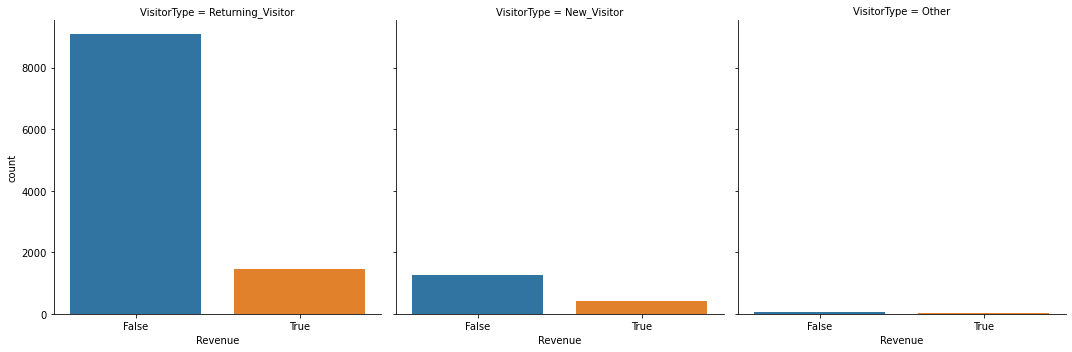

In [26]:
# Revenue Versus Visitor Type
g = sns.catplot(
    "Revenue",
    col="VisitorType",
    col_wrap=3,
    data=dataset,
    kind="count",
    height=5,
    aspect=1,
)
plt.show()

More revenue conversions happen for returning customers than new customers.

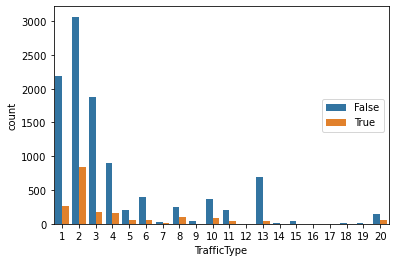

In [27]:
# Revenue Versus Traffic Type
sns.countplot(x="TrafficType", hue="Revenue", data=dataset)
plt.legend(loc="right")
plt.show()

Most revenue conversion happens for web traffic generated from source 2.

### Relationship between Revenue and Other Variables

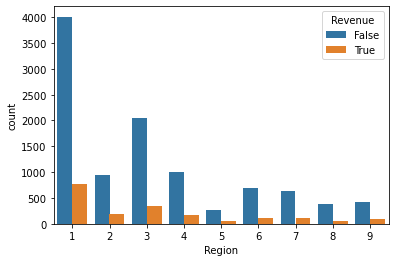

In [28]:
sns.countplot(x="Region", hue="Revenue", data=dataset)
plt.show()

Region 1 accounts for most sales, and region 3 the second most.

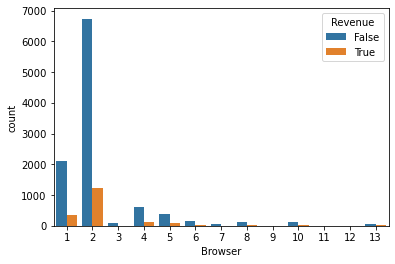

In [29]:
sns.countplot(x="Browser", hue="Revenue", data=dataset)
plt.show()

More revenue-generating transactions have been performed from Browser 2.

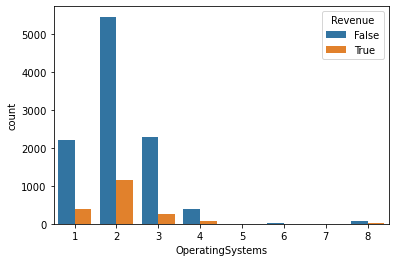

In [30]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=dataset)
plt.show()

More revenue-generating transactions happened with OS 2 than the other types.

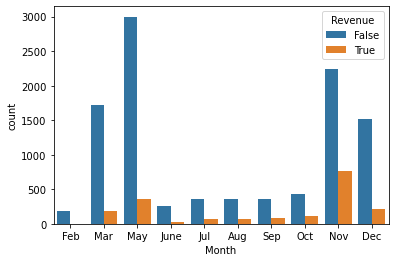

In [31]:
sns.countplot(
    x="Month",
    hue="Revenue",
    data=dataset,
    order=[
        "Feb",
        "Mar",
        "May",
        "June",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.show()

The greatest number of purchases were made in November.

<a id="linear"></a>
## Linear relationships

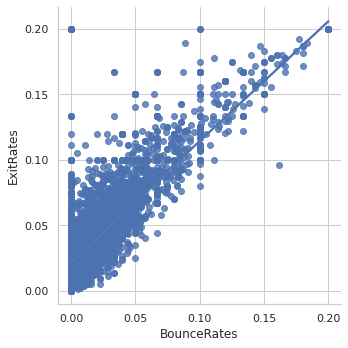

In [32]:
# Bounce Rate versus Exit Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=dataset)

There is a positive correlation between the bounce rate and the exit rate. With the increase in bounce rate, the exit rate of the page increases.

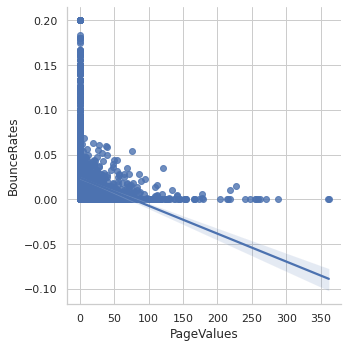

In [33]:
# Page Value versus Bounce Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates", data=dataset)

There is a negative correlation between page value and bounce rate. As the page value increases, the bounce rate decreases.

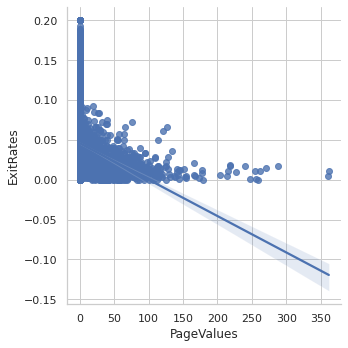

In [34]:
# Page Value versus Exit Rate
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates", data=dataset)

Negative correlation between page value and exit rate. Web pages with a better page value have a lower exit rate.

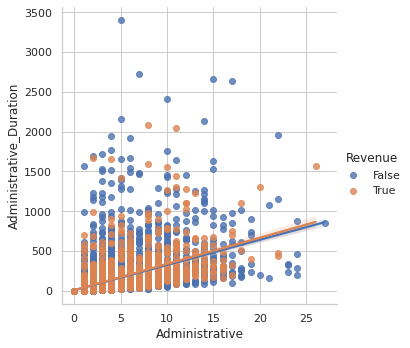

In [35]:
# Impact of Administration Page Views and
# Administrative Pageview Duration on Revenue
sns.set(style="whitegrid")
ax = sns.lmplot(
    x="Administrative",
    y="Administrative_Duration",
    hue="Revenue",
    data=dataset,
)

Administrative-related pageviews and the administrative-related pageview duration are positively correlated. When there is an increase in the number of administrative pageviews, the administrative pageview duration also increases.

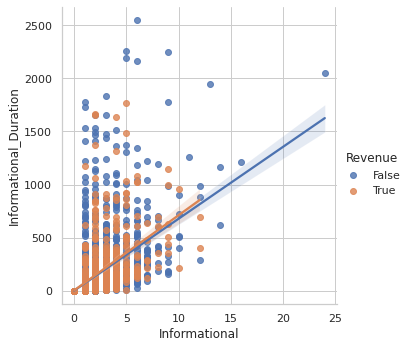

In [36]:
# Impact of Information Page Views and Information Pageview Duration on Revenue
sns.set(style="whitegrid")
ax = sns.lmplot(
    x="Informational", y="Informational_Duration", hue="Revenue", data=dataset
)

Information page views and information pageview duration are positively correlated. Customers who have made online purchases visited fewer numbers of informational pages. This implies that informational pageviews do not have much effect on revenue generation.